In [1]:
from google.colab import drive
drive.mount('/content/drive/')

!pip install -q keras
import keras


Mounted at /content/drive/


In [2]:
# Update package list
!sudo apt-get update -y

# Install Python 3.9
!sudo apt-get install python3.9

# Change alternatives
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 2

# Check Python version
!python --version

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,372 kB]
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,347 kB]
Fetched 5,060 kB i

In [3]:
#importing the libraries
import pickle
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config inlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')

from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import folium
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import operator
from sklearn import metrics, preprocessing
import tensorflow as tf
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import datetime
import os


In [4]:
#download nltk packages
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [5]:
import pandas as pd

restaurant_df = pd.read_csv('/content/drive/MyDrive/datasets/restaurant_data.csv')

restaurant_df

,Name,Rating,Pricing,URL,Latitude,Longitude,Transactions,Location,Phone,Display Phone,Distance,Reviews,Review Count,Cuisine,Restaurant ID,Number of Reviews
0,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.995970,"['delivery', 'pickup', 'restaurant_reservation']","35 W 13th St, New York, NY 10011",1.212367e+10,(212) 367-1979,3526.365252,[{'text': 'This small and crowded place seems ...,3,"I, t, a, l, i, a, n",hdiuRS9sVZSMReZm4oV5SA,1851
1,LoveMama,5,$$,https://www.yelp.com/biz/lovemama-new-york?adj...,40.730409,-73.986127,"['delivery', 'pickup', 'restaurant_reservation']","174 2nd Ave, New York, NY 10003",1.212255e+10,(212) 254-5370,2645.074283,[{'text': 'Absolutely LOVED LoveMama!! As a co...,3,"T, h, a, i",jjJc_CrkB2HodEinB6cWww,6377
2,Ye's Apothecary,5,$$$,https://www.yelp.com/biz/yes-apothecary-new-yo...,40.719450,-73.989800,[],"119 Orchard St, New York, NY 10002",NaN,NaN,1638.756115,[{'text': 'Edy and Josh are the BEST bartender...,3,"S, z, e, c, h, u, a, n",8YWLuLUKj0t_0_Xv06UUtw,212
3,Joe's Shanghai,4,$$,https://www.yelp.com/biz/joes-shanghai-new-yor...,40.715661,-73.996701,"['delivery', 'pickup']","46 Bowery St, New York, NY 10013",1.212234e+10,(212) 233-8888,1766.176007,[{'text': 'This is the third stop of our food ...,3,"S, h, a, n, g, h, a, i, n, e, s, e",0CjK3esfpFcxIopebzjFxA,7098
4,Antidote,4,$$,https://www.yelp.com/biz/antidote-brooklyn-2?a...,40.714253,-73.965448,"['delivery', 'pickup']","66 S 2nd St, Brooklyn, NY 11249",1.718782e+10,(718) 782-2585,1376.494330,[{'text': 'Excellent service & food! The drink...,3,"C, o, c, k, t, a, i, l, , B, a, r, s",4DInnPhOyvXFbYpUdO0SMQ,325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ABC Kitchen,5,$$$,https://www.yelp.com/biz/abc-kitchen-new-york?...,40.737750,-73.989634,['delivery'],"35 E 18th St, New York, NY 10003",1.212476e+10,(212) 475-5829,3508.876621,[{'text': 'Came in shortly after 12:30pm for a...,3,"B, r, e, a, k, f, a, s, t, , &, , B, r, u, n...",dMhRafXdr765DHe0k-QfaQ,3165
496,Liberty Bagels,5,$,https://www.yelp.com/biz/liberty-bagels-new-yo...,40.763080,-73.972750,[],"16 E 58th St, New York, NY 10022",NaN,NaN,6229.014047,[{'text': 'Oh hells yes. The garlic bagel her...,3,"B, a, g, e, l, s",r1QcTb4XA1t1gmni8qMBLw,131
497,Luchadores,5,$$,https://www.yelp.com/biz/luchadores-new-york?a...,40.705820,-74.004110,"['delivery', 'pickup']","87 South St, New York, NY 10038",1.917409e+10,(917) 409-3033,2132.580935,"[{'text': ""It's gotten super popular over the ...",3,"M, e, x, i, c, a, n",8_NilECM6qg_L7WYb25uNw,130
498,Pier 66 Maritime,4,$$,https://www.yelp.com/biz/pier-66-maritime-new-...,40.752197,-74.009167,[],"W 26th St, Hudson River Park, New York, NY 10010",1.212990e+10,(212) 989-6363,5609.568583,"[{'text': ""My friend had her birthday dinner h...",3,"A, m, e, r, i, c, a, n, , (, T, r, a, d, i, t...",80jmHsdVmeYxaoAHaegKyQ,63


In [6]:
user_revs_df = pd.read_csv('/content/drive/MyDrive/datasets/final_revs.csv')
user_revs_df.head()

,Richard D.,/user_details?userid=pRfWy61wU9e1nrCVrOEWLA,"New York, NY",2/16/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-square-new-york-2?adjust_creative=YOPxpPg1qGggP5qGSctmew&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=YOPxpPg1qGggP5qGSctmew
0,Elisa H.,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"Brooklyn, NY",1/6/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
1,Morlene C.,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"Brooklyn, NY",12/15/2022,3.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
2,Ruwan J.,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,"New York, NY",3/23/2023,4.0,Urbanspace Union Square is a newish addition-...,https://www.yelp.com/biz/urbanspace-union-squa...
3,Mike C.,/user_details?userid=37cpUoM8hlkSQfReIEBd-Q,"Forest Hills, NY",12/14/2022,5.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
4,Brad M.,/user_details?userid=IMD57wrCtAPbvBSAlI2nkA,"Princeton, NJ",1/10/2023,5.0,Great venue. The various vendors have amazing ...,https://www.yelp.com/biz/urbanspace-union-squa...


In [7]:
'1. EXPLORING THE RESTAURANT DATASET'
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               500 non-null    object 
 1   Rating             500 non-null    int64  
 2   Pricing            315 non-null    object 
 3   URL                500 non-null    object 
 4   Latitude           500 non-null    float64
 5   Longitude          500 non-null    float64
 6   Transactions       500 non-null    object 
 7   Location           500 non-null    object 
 8   Phone              430 non-null    float64
 9   Display Phone      430 non-null    object 
 10  Distance           500 non-null    float64
 11  Reviews            500 non-null    object 
 12  Review Count       500 non-null    int64  
 13  Cuisine            500 non-null    object 
 14  Restaurant ID      500 non-null    object 
 15  Number of Reviews  500 non-null    int64  
dtypes: float64(4), int64(3), o

In [8]:
#transforming the cuisines to their real names
restaurant_df['Cuisine'].head()

0                      I, t, a, l, i, a, n
1                               T, h, a, i
2                   S, z, e, c, h, u, a, n
3       S, h, a, n, g, h, a, i, n, e, s, e
4    C, o, c, k, t, a, i, l,  , B, a, r, s
Name: Cuisine, dtype: object

In [9]:
# Converting the cuisine text to a more human readable format
restaurant_df['Cuisine'] = restaurant_df['Cuisine'].apply(lambda x: [x])
restaurant_df['Cuisine'] = restaurant_df['Cuisine'].apply(lambda x: ''.join(x))
restaurant_df['Cuisine'] = restaurant_df['Cuisine'].apply(lambda x: x.replace('  ', '-'))
restaurant_df['Cuisine'] = restaurant_df['Cuisine'].apply(lambda x: x.replace(',', ''))
restaurant_df['Cuisine'] = restaurant_df['Cuisine'].apply(lambda x: x.replace(' ', ''))
restaurant_df['Cuisine'] = restaurant_df['Cuisine'].apply(lambda x: x.replace('-', ' '))
restaurant_df['Cuisine'].head()


0          Italian
1             Thai
2         Szechuan
3     Shanghainese
4    Cocktail Bars
Name: Cuisine, dtype: object

In [10]:
# viewing the number of unique restaurants
len(restaurant_df['Restaurant ID'].unique())

435

In [11]:
# Types of transactions occuring in the restaurants
set(restaurant_df['Transactions'])

{"['delivery', 'pickup', 'restaurant_reservation']",
 "['delivery', 'pickup']",
 "['delivery']",
 "['pickup', 'delivery', 'restaurant_reservation']",
 "['pickup', 'delivery']",
 "['pickup', 'restaurant_reservation', 'delivery']",
 "['restaurant_reservation', 'delivery', 'pickup']",
 "['restaurant_reservation', 'delivery']",
 "['restaurant_reservation']",
 '[]'}

In [12]:
# viewing the rating scale of the restaurants
set(restaurant_df['Rating'])

{1, 2, 3, 4, 5}

In [13]:
#EXPLORING THE REVIEWS DATASET
user_revs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127238 entries, 0 to 127237
Data columns (total 7 columns):
 #   Column                                                                                                                                                                                           Non-Null Count   Dtype  
---  ------                                                                                                                                                                                           --------------   -----  
 0   Richard D.                                                                                                                                                                                       127238 non-null  object 
 1   /user_details?userid=pRfWy61wU9e1nrCVrOEWLA                                                                                                                                                      127238 non-null  object

In [14]:
#Adding headers to the fields
columns=['User_Name','Account','Location','Date_of_review','Rating','Comment','URL']
user_revs_df.columns = columns
user_revs_df.head()


,User_Name,Account,Location,Date_of_review,Rating,Comment,URL
0,Elisa H.,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"Brooklyn, NY",1/6/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
1,Morlene C.,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"Brooklyn, NY",12/15/2022,3.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
2,Ruwan J.,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,"New York, NY",3/23/2023,4.0,Urbanspace Union Square is a newish addition-...,https://www.yelp.com/biz/urbanspace-union-squa...
3,Mike C.,/user_details?userid=37cpUoM8hlkSQfReIEBd-Q,"Forest Hills, NY",12/14/2022,5.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
4,Brad M.,/user_details?userid=IMD57wrCtAPbvBSAlI2nkA,"Princeton, NJ",1/10/2023,5.0,Great venue. The various vendors have amazing ...,https://www.yelp.com/biz/urbanspace-union-squa...


In [15]:
# Checking how many unique users rated
len(user_revs_df['Account'].unique())

90324

In [16]:
#merge the two datasets
user_restaurant_df = pd.merge(user_revs_df, restaurant_df, on='URL', how='left')
user_restaurant_df.head(3)

,User_Name,Account,Location_x,Date_of_review,Rating_x,Comment,URL,Name,Rating_y,Pricing,...,Transactions,Location_y,Phone,Display Phone,Distance,Reviews,Review Count,Cuisine,Restaurant ID,Number of Reviews
0,Elisa H.,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"Brooklyn, NY",1/6/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,Urbanspace Union Square,3.0,NaN,...,[],"124 E 14th St, New York, NY 10003",1.716466e+10,(716) 466-2713,3040.701171,[{'text': 'Yet another food hall opens up. The...,3.0,Food Court,JjomQ2VCojutXJQeGVt-QA,13.0
1,Morlene C.,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"Brooklyn, NY",12/15/2022,3.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,Urbanspace Union Square,3.0,NaN,...,[],"124 E 14th St, New York, NY 10003",1.716466e+10,(716) 466-2713,3040.701171,[{'text': 'Yet another food hall opens up. The...,3.0,Food Court,JjomQ2VCojutXJQeGVt-QA,13.0
2,Ruwan J.,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,"New York, NY",3/23/2023,4.0,Urbanspace Union Square is a newish addition-...,https://www.yelp.com/biz/urbanspace-union-squa...,Urbanspace Union Square,3.0,NaN,...,[],"124 E 14th St, New York, NY 10003",1.716466e+10,(716) 466-2713,3040.701171,[{'text': 'Yet another food hall opens up. The...,3.0,Food Court,JjomQ2VCojutXJQeGVt-QA,13.0


In [17]:
#Finding the columns of the merged dataset
user_restaurant_df.columns

Index(['User_Name', 'Account', 'Location_x', 'Date_of_review', 'Rating_x',
       'Comment', 'URL', 'Name', 'Rating_y', 'Pricing', 'Latitude',
       'Longitude', 'Transactions', 'Location_y', 'Phone', 'Display Phone',
       'Distance', 'Reviews', 'Review Count', 'Cuisine', 'Restaurant ID',
       'Number of Reviews'],
      dtype='object')

In [18]:
# renaming columns
user_restaurant_df.rename(columns={'Account': 'user_ID', 'Rating_x': 'user_rating', 'Rating_y': 'avg_restaurant_rating',
                                    'Cuisine': 'cuisine', 'Pricing': 'pricing',
                                    'URL': 'url', 'Location_x': 'location',
                                    'Restaurant ID': 'id', 'Date_of_review': 'review_date',
                                    'Transactions': 'transactions', 'Number of Reviews':'number_of_reviews',
                                   'Comment': 'comments', 'Reviews': 'reviews'}, inplace=True)

In [19]:
#Drop unnecessary columns
unnecessary_columns = ['User_Name', 'Name', 'Phone', 'Display Phone', 'Distance', 'Location_y',
                       'Review Count']
user_restaurant_df = user_restaurant_df.drop(unnecessary_columns, axis =1)
user_restaurant_df.head(3)

,user_ID,location,review_date,user_rating,comments,url,avg_restaurant_rating,pricing,Latitude,Longitude,transactions,reviews,cuisine,id,number_of_reviews
0,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"Brooklyn, NY",1/6/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,NaN,40.733618,-73.988511,[],[{'text': 'Yet another food hall opens up. The...,Food Court,JjomQ2VCojutXJQeGVt-QA,13.0
1,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"Brooklyn, NY",12/15/2022,3.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,NaN,40.733618,-73.988511,[],[{'text': 'Yet another food hall opens up. The...,Food Court,JjomQ2VCojutXJQeGVt-QA,13.0
2,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,"New York, NY",3/23/2023,4.0,Urbanspace Union Square is a newish addition-...,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,NaN,40.733618,-73.988511,[],[{'text': 'Yet another food hall opens up. The...,Food Court,JjomQ2VCojutXJQeGVt-QA,13.0


In [20]:
# Since pricing categorical data, we can use mode
user_restaurant_df['pricing'] = user_restaurant_df['pricing'].fillna(user_restaurant_df['pricing'].mode()[0])
# Empty transactions filled with None
user_restaurant_df['transactions'] = user_restaurant_df['transactions'].fillna(user_restaurant_df['transactions'].mode()[0])
# Missing Cuisines filled with a random one
user_restaurant_df['cuisine'] = user_restaurant_df['cuisine'].fillna('random')
# Missing average rating filled with the mode
user_restaurant_df['avg_restaurant_rating'] = user_restaurant_df['avg_restaurant_rating'].fillna(user_restaurant_df['avg_restaurant_rating'].mode()[0])
# Missing review filled with no reviews
user_restaurant_df['reviews'] = user_restaurant_df['reviews'].fillna('no reviews')
# Missing id filled with no identifier
user_restaurant_df['id'] = user_restaurant_df['id'].fillna('no identifier')

In [21]:
user_restaurant_df.dtypes

user_ID                   object
location                  object
review_date               object
user_rating              float64
comments                  object
url                       object
avg_restaurant_rating    float64
pricing                   object
Latitude                 float64
Longitude                float64
transactions              object
reviews                   object
cuisine                   object
id                        object
number_of_reviews        float64
dtype: object

In [22]:
# Converting the columns to lower case
user_restaurant_df['url'] = user_restaurant_df['url'].str.lower()
user_restaurant_df['location'] = user_restaurant_df['location'].str.lower()
user_restaurant_df['cuisine'] = user_restaurant_df['cuisine'].str.lower()
user_restaurant_df['comments'] = user_restaurant_df['comments'].str.lower()

user_restaurant_df.sample(5)

,user_ID,location,review_date,user_rating,comments,url,avg_restaurant_rating,pricing,Latitude,Longitude,transactions,reviews,cuisine,id,number_of_reviews
15140,/user_details?userid=NvUeb5G_mSSxgKhEE_Hueg,"san diego, ca",12/25/2010,4.0,no comment,https://www.yelp.com/biz/katsu-hama-new-york?a...,5.0,$$,40.756380,-73.977590,"['pickup', 'delivery', 'restaurant_reservation']","[{'text': ""Hands down the BEST katsu I've ever...",japanese,-J8VuX3wGrYSOBu2G0hMsw,1562.0
80622,/user_details?userid=aGuMV_5NXG2i_kj_TMo0ag,"brooklyn, ny",12/11/2008,5.0,came here on one of the coldest nights this mo...,https://www.yelp.com/biz/macao-trading-company...,5.0,$$$,40.719623,-74.003904,"['delivery', 'pickup']",[{'text': '- excellent drinks\n- excellent ser...,asian fusion,U74_3F7r3tMhd6dmTmDBxQ,844.0
83305,/user_details?userid=4etoSV-e8u0Ay7lvxDCbRw,"manhattan, ny",3/17/2015,5.0,this place was just amazing. food is authentic...,https://www.yelp.com/biz/the-greek-new-york-2?...,5.0,$$$,40.724032,-74.010448,"['delivery', 'pickup']",[{'text': 'Truly a hidden gem! Not one to vent...,greek,6gDUVNZo0E9lxO2DkAhHOQ,524.0
5738,/user_details?userid=8XQpF4nUwN5m0QpOotrB3g,"miami, fl",12/31/2010,5.0,no comment,https://www.yelp.com/biz/joes-shanghai-new-yor...,4.0,$$,40.715661,-73.996701,"['delivery', 'pickup']",[{'text': 'This is the third stop of our food ...,shanghainese,0CjK3esfpFcxIopebzjFxA,7098.0
32092,/user_details?userid=s6L04yD0DQ2_69Od8j3eSw,"brooklyn, ny",12/5/2017,5.0,great authentic mexican food! i'm originally f...,https://www.yelp.com/biz/los-tacos-no-1-new-yo...,4.0,$,40.757507,-73.987772,['delivery'],"[{'text': ""very good and juicy, but they never...",tacos,SULHf6nGQ8sK0UpG1XU30w,2659.0


In [23]:
# converts the strings to python list
user_restaurant_df['transactions'] = user_restaurant_df['transactions'].apply(lambda x: literal_eval(x))

# joins the created python lists together
user_restaurant_df['transactions'] = user_restaurant_df['transactions'].apply(lambda x: ', '.join(x))
user_restaurant_df['transactions'].sample(10)

57244     delivery, pickup
120378    pickup, delivery
1040      delivery, pickup
109561    delivery, pickup
56890     pickup, delivery
62077     delivery, pickup
46593                     
84877             delivery
33365     pickup, delivery
25408     delivery, pickup
Name: transactions, dtype: object

In [24]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def process_sentences(text):
    temp_sent =[]

    # Tokenize words
    words = nltk.word_tokenize(text)

    # Lemmatize each of the words based on their position in the sentence
    tags = nltk.pos_tag(words)
    for i, word in enumerate(words):
        # only verbs
        if tags[i][1] in ('VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'):
            lemmatized = lemmatizer.lemmatize(word, 'v')
        else:
            lemmatized = lemmatizer.lemmatize(word)

        # Remove stop words and non alphabet tokens
        if lemmatized not in stop_words and lemmatized.isalpha():
            temp_sent.append(lemmatized)

    # Some other clean-up
    full_sentence = ' '.join(temp_sent)
    full_sentence = full_sentence.replace("n't", " not")
    full_sentence = full_sentence.replace("'m", " am")
    full_sentence = full_sentence.replace("'s", " is")
    full_sentence = full_sentence.replace("'re", " are")
    full_sentence = full_sentence.replace("'ll", " will")
    full_sentence = full_sentence.replace("'ve", " have")
    full_sentence = full_sentence.replace("'d", " would")
    return full_sentence

In [25]:
# creation of filtered comments
user_restaurant_df['processed_comments'] = user_restaurant_df['comments'].apply(process_sentences)

In [26]:
# creation of filtered cuisines
user_restaurant_df['processed_cuisine'] = user_restaurant_df['cuisine'].apply(process_sentences)

In [27]:
# creation of filtered transactions
user_restaurant_df['processed_transactions'] = user_restaurant_df['transactions'].apply(process_sentences)

In [28]:
# Preview of the processed columns
user_restaurant_df[['processed_comments', 'comments', 'processed_cuisine', 'cuisine', 'processed_transactions', 'transactions']].sample(5)

,processed_comments,comments,processed_cuisine,cuisine,processed_transactions,transactions
26604,comment,no comment,korean,korean,delivery,delivery
11427,comment,no comment,breakfast brunch,breakfast & brunch,delivery,delivery
12075,great ambiance full pack sunday night reservat...,great ambiance and full but not packed on sund...,breakfast brunch,breakfast & brunch,delivery,delivery
131737,comment,no comment,random,random,delivery pickup,"delivery, pickup"
37783,finally try peter luger living brooklyn year s...,i finally tried peter luger after living in br...,steakhouse,steakhouses,,


In [29]:
user_restaurant_df['bogs'] = user_restaurant_df['processed_cuisine'] + ' ' + user_restaurant_df['processed_comments'] + ' ' + user_restaurant_df['processed_transactions']
display('A sample of bag of words', user_restaurant_df[['processed_comments', 'processed_cuisine', 'processed_transactions','bogs']].sample(5))

'A sample of bag of words'

,processed_comments,processed_cuisine,processed_transactions,bogs
57911,comment,italian,delivery pickup,italian comment delivery pickup
66505,comment,cocktail bar,delivery pickup,cocktail bar comment delivery pickup
136448,come second day open nyt mention food service ...,random,delivery pickup,random come second day open nyt mention food s...
130395,come brunch order food drink time egg sandwich...,random,delivery pickup,random come brunch order food drink time egg s...
86153,fun stop busy fast service order fried tofu pa...,chinese,delivery pickup,chinese fun stop busy fast service order fried...


In [30]:
user_restaurant_df.shape

(139111, 19)

In [31]:
reviewed_data = user_restaurant_df[user_restaurant_df['reviews'] != 'no reviews']

reviewed_data.shape

(125092, 19)

In [32]:
# Create a map centered on a specific location
map_restaurants = folium.Map(location=[40.7128, -74.0060], zoom_start=11, zoom_control=False)

# Add markers for each restaurant using the latitude and longitude data
for index, row in restaurant_df.iterrows():
    name = row['Name']
    latitude = row['Latitude']
    longitude = row['Longitude']
    marker = folium.Marker([latitude, longitude], popup=name)
    marker.add_to(map_restaurants)

# Display the map
map_restaurants

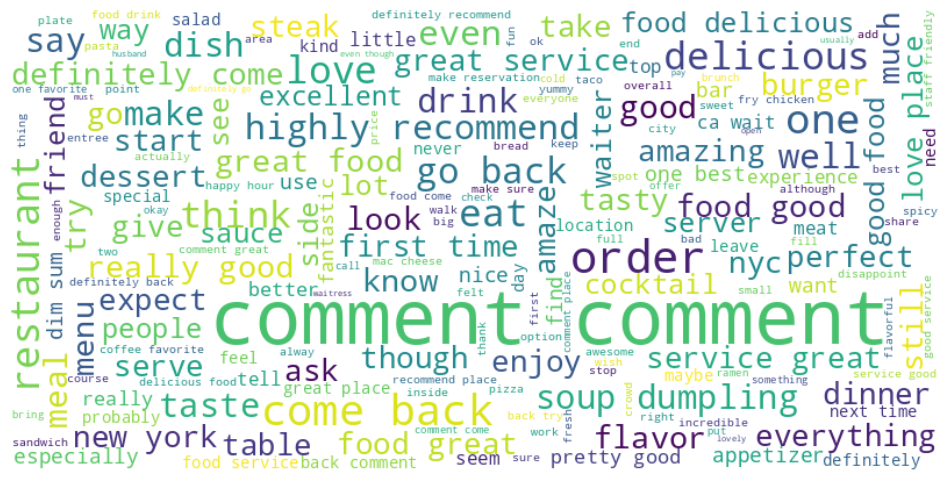

In [33]:
# COMMON WORDS IN REVIEW

# concatenate all the tweets into a single string
all_reviews = ' '.join(user_restaurant_df['processed_comments'].values)

# create a WordCloud object
wc = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(all_reviews)

# display the word cloud
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
#calculating subjectivity and polarity scores using TextBlob
#Sentiment analysis

user_restaurant_df['Subjectivity'] = user_restaurant_df['processed_comments'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
user_restaurant_df['Polarity'] = user_restaurant_df['processed_comments'].apply(lambda x: TextBlob(x).sentiment.polarity)
user_restaurant_df['Review_sentiment'] = user_restaurant_df['Polarity'].apply(lambda x: 'positive' if x > 0 else (
                                'negative' if x < 0 else 'neutral'))

user_restaurant_df.head(3)

,user_ID,location,review_date,user_rating,comments,url,avg_restaurant_rating,pricing,Latitude,Longitude,...,cuisine,id,number_of_reviews,processed_comments,processed_cuisine,processed_transactions,bogs,Subjectivity,Polarity,Review_sentiment
0,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"brooklyn, ny",1/6/2023,4.0,no comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,$$,40.733618,-73.988511,...,food court,JjomQ2VCojutXJQeGVt-QA,13.0,comment,food court,,food court comment,0.00,0.000000,neutral
1,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"brooklyn, ny",12/15/2022,3.0,no comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,$$,40.733618,-73.988511,...,food court,JjomQ2VCojutXJQeGVt-QA,13.0,comment,food court,,food court comment,0.00,0.000000,neutral
2,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,"new york, ny",3/23/2023,4.0,urbanspace union square is a newish addition-...,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,$$,40.733618,-73.988511,...,food court,JjomQ2VCojutXJQeGVt-QA,13.0,urbanspace union square newish addition add sm...,food court,,food court urbanspace union square newish addi...,0.55,0.194167,positive


positive    71314
neutral     62262
negative     5535
Name: Review_sentiment, dtype: int64


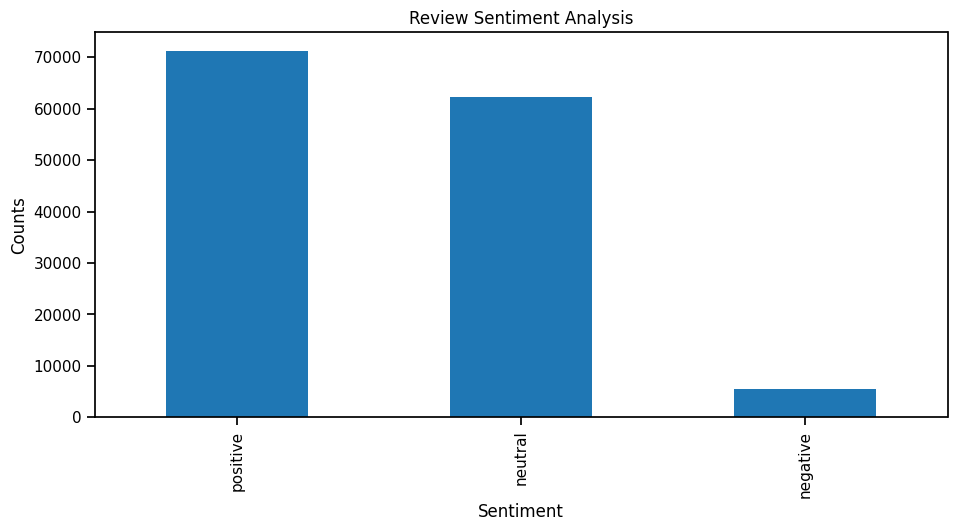

In [35]:
# Show the value counts
print(user_restaurant_df['Review_sentiment'].value_counts())

# bar plot showing the sentiment categories
plt.subplots(figsize= (11, 5))
plt.title('Review Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.xticks(rotation=45)
user_restaurant_df['Review_sentiment'].value_counts().plot(kind='bar')
plt.show()

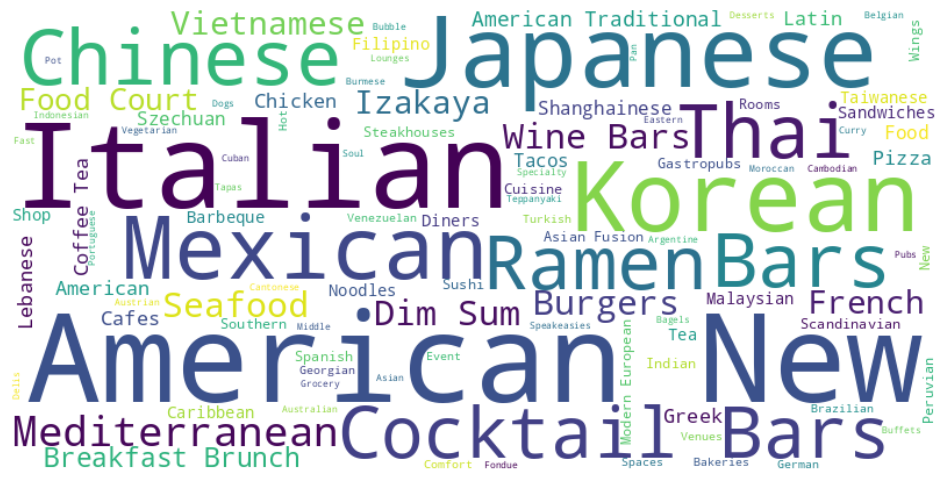

In [36]:
#MOST POPULAR CUISINES
cuisine_processed = restaurant_df['Cuisine'].apply(process_sentences)

# Convert the series into string text
text = ' '.join(cuisine_processed.values)

# create a WordCloud object
wc = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)
# display the word cloud
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

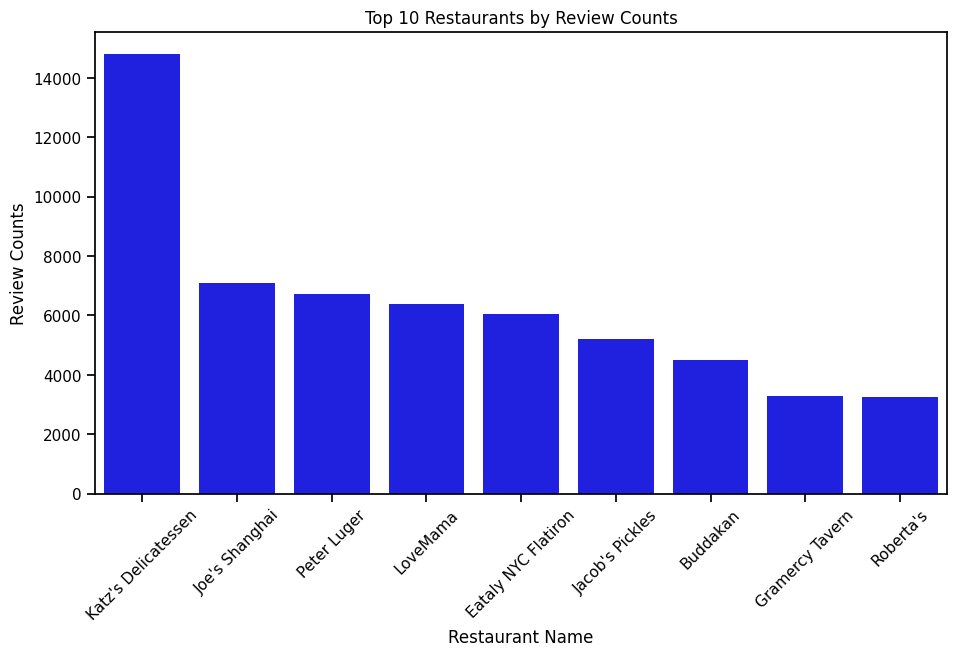

In [37]:
restaurants_review_df = restaurant_df[['Name','Number of Reviews']]
#get the top10 restaurants
top10 = restaurants_review_df.nlargest(10, 'Number of Reviews')
# create a barplot of the top 10 restaurants
plt.figure(figsize=(11,6))
sns.barplot(data=top10, x='Name', y='Number of Reviews', color='blue')
plt.title("Top 10 Restaurants by Review Counts")
plt.xlabel("Restaurant Name")
plt.ylabel("Review Counts")
plt.xticks(rotation=45)
plt.show()

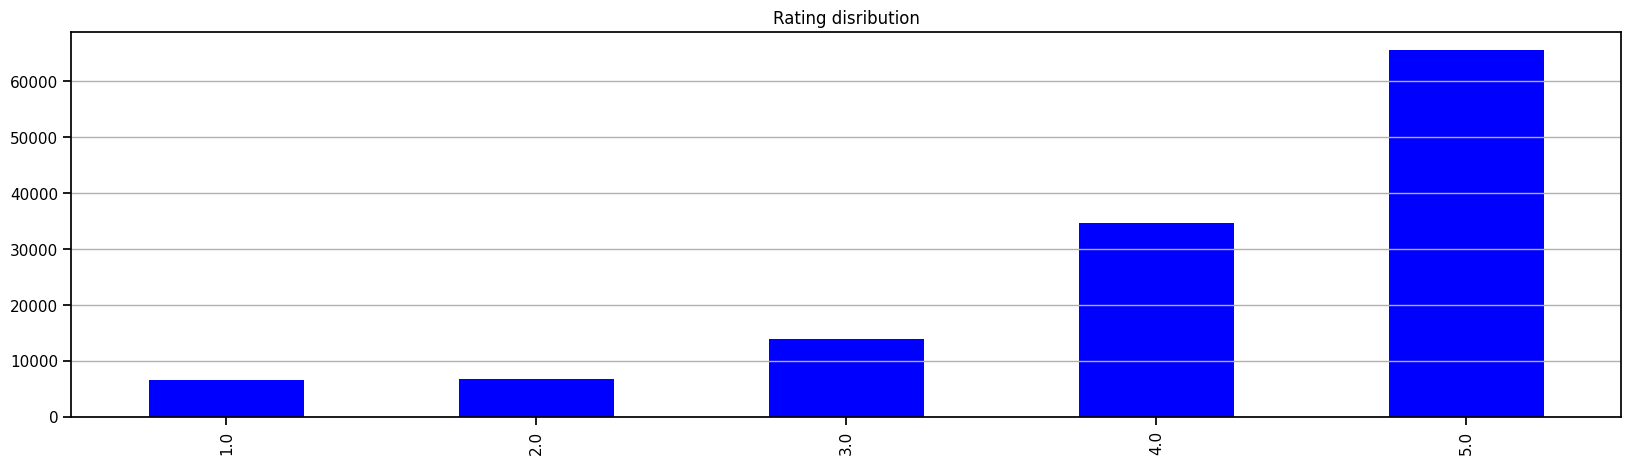

In [38]:
#ratingd distribution
# remove grid
user_revs_df['Rating'].value_counts().sort_index().plot(kind="bar", color="blue", title="Rating disribution",
                                                figsize=(20,5)).grid(axis='y')
plt.show()

In [39]:
#3. DATA PREPARATION
# viewing the restaurant data set before cleaning occurs
display('Starting point of dataset restaurants', restaurant_df)

'Starting point of dataset restaurants'

,Name,Rating,Pricing,URL,Latitude,Longitude,Transactions,Location,Phone,Display Phone,Distance,Reviews,Review Count,Cuisine,Restaurant ID,Number of Reviews
0,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.995970,"['delivery', 'pickup', 'restaurant_reservation']","35 W 13th St, New York, NY 10011",1.212367e+10,(212) 367-1979,3526.365252,[{'text': 'This small and crowded place seems ...,3,Italian,hdiuRS9sVZSMReZm4oV5SA,1851
1,LoveMama,5,$$,https://www.yelp.com/biz/lovemama-new-york?adj...,40.730409,-73.986127,"['delivery', 'pickup', 'restaurant_reservation']","174 2nd Ave, New York, NY 10003",1.212255e+10,(212) 254-5370,2645.074283,[{'text': 'Absolutely LOVED LoveMama!! As a co...,3,Thai,jjJc_CrkB2HodEinB6cWww,6377
2,Ye's Apothecary,5,$$$,https://www.yelp.com/biz/yes-apothecary-new-yo...,40.719450,-73.989800,[],"119 Orchard St, New York, NY 10002",NaN,NaN,1638.756115,[{'text': 'Edy and Josh are the BEST bartender...,3,Szechuan,8YWLuLUKj0t_0_Xv06UUtw,212
3,Joe's Shanghai,4,$$,https://www.yelp.com/biz/joes-shanghai-new-yor...,40.715661,-73.996701,"['delivery', 'pickup']","46 Bowery St, New York, NY 10013",1.212234e+10,(212) 233-8888,1766.176007,[{'text': 'This is the third stop of our food ...,3,Shanghainese,0CjK3esfpFcxIopebzjFxA,7098
4,Antidote,4,$$,https://www.yelp.com/biz/antidote-brooklyn-2?a...,40.714253,-73.965448,"['delivery', 'pickup']","66 S 2nd St, Brooklyn, NY 11249",1.718782e+10,(718) 782-2585,1376.494330,[{'text': 'Excellent service & food! The drink...,3,Cocktail Bars,4DInnPhOyvXFbYpUdO0SMQ,325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ABC Kitchen,5,$$$,https://www.yelp.com/biz/abc-kitchen-new-york?...,40.737750,-73.989634,['delivery'],"35 E 18th St, New York, NY 10003",1.212476e+10,(212) 475-5829,3508.876621,[{'text': 'Came in shortly after 12:30pm for a...,3,Breakfast & Brunch,dMhRafXdr765DHe0k-QfaQ,3165
496,Liberty Bagels,5,$,https://www.yelp.com/biz/liberty-bagels-new-yo...,40.763080,-73.972750,[],"16 E 58th St, New York, NY 10022",NaN,NaN,6229.014047,[{'text': 'Oh hells yes. The garlic bagel her...,3,Bagels,r1QcTb4XA1t1gmni8qMBLw,131
497,Luchadores,5,$$,https://www.yelp.com/biz/luchadores-new-york?a...,40.705820,-74.004110,"['delivery', 'pickup']","87 South St, New York, NY 10038",1.917409e+10,(917) 409-3033,2132.580935,"[{'text': ""It's gotten super popular over the ...",3,Mexican,8_NilECM6qg_L7WYb25uNw,130
498,Pier 66 Maritime,4,$$,https://www.yelp.com/biz/pier-66-maritime-new-...,40.752197,-74.009167,[],"W 26th St, Hudson River Park, New York, NY 10010",1.212990e+10,(212) 989-6363,5609.568583,"[{'text': ""My friend had her birthday dinner h...",3,American (Traditional),80jmHsdVmeYxaoAHaegKyQ,63


In [40]:
#check duplicates
restaurant_df.duplicated().sum()

59

In [41]:
#drop duplicates
restaurant_df.drop_duplicates(inplace=True)

In [42]:
# Pick out the number of restaurants already scraped in the users_revs side

filtered_restaurant_df = restaurant_df[restaurant_df['URL'].isin(user_revs_df['URL'].unique())]
len(set(filtered_restaurant_df['Restaurant ID']))

299

In [43]:
# giving the restaurants a numerical id
filtered_restaurant_df['Rest_num_id'] = pd.factorize(filtered_restaurant_df['URL'])[0]

In [44]:
#Adding the top comments sof reviewers into a column that is related to the restaurants they reviewed
filtered_restaurant_df['Comments'] = ''

# loop through each row in the original dataframe
for index, row in filtered_restaurant_df.iterrows():
    # reviews = row['Reviews']

    url = row['URL']
    reviews = []
    holder = user_revs_df.loc[user_revs_df['URL'] == url].iterrows()
    for row in holder:
        comment = row[1]['Comment']
        if row[1]['Comment'] != 'No comment':
            reviews.append([comment])
    if reviews == []:
        reviews.append('')
    # print(reviews[0])
    # print(f'The count {index}')

    filtered_restaurant_df['Comments'][filtered_restaurant_df['URL'] == url] = reviews[0]

In [45]:
# removing unnecessary columns
filtered_restaurant_df.drop(columns=['Latitude', 'Longitude', 'Phone', 'Display Phone', 'Reviews',
                                    'Review Count', 'Distance'], inplace=True)


# renaming columns as a better convention
filtered_restaurant_df.rename(columns={'Name': 'name', 'Rating': 'rating', 'Rest_num_id': 'num_id',
                                       'Cuisine': 'cuisine', 'Pricing': 'price', 'Location': 'location',
                                      'Restaurant ID': 'id', 'Number of Reviews': 'review counts',
                                       'Transactions': 'transactions', 'Comments': 'comments'}, inplace=True)

display('After reduction and renaming', filtered_restaurant_df.head())

'After reduction and renaming'

,name,rating,price,URL,transactions,location,cuisine,id,review counts,num_id,comments
0,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,"['delivery', 'pickup', 'restaurant_reservation']","35 W 13th St, New York, NY 10011",Italian,hdiuRS9sVZSMReZm4oV5SA,1851,0,This small and crowded place seems to be a nei...
1,LoveMama,5,$$,https://www.yelp.com/biz/lovemama-new-york?adj...,"['delivery', 'pickup', 'restaurant_reservation']","174 2nd Ave, New York, NY 10003",Thai,jjJc_CrkB2HodEinB6cWww,6377,1,Absolutely LOVED LoveMama!! As a college stude...
2,Ye's Apothecary,5,$$$,https://www.yelp.com/biz/yes-apothecary-new-yo...,[],"119 Orchard St, New York, NY 10002",Szechuan,8YWLuLUKj0t_0_Xv06UUtw,212,2,"Good food, good service and good vibe. Drinks ..."
3,Joe's Shanghai,4,$$,https://www.yelp.com/biz/joes-shanghai-new-yor...,"['delivery', 'pickup']","46 Bowery St, New York, NY 10013",Shanghainese,0CjK3esfpFcxIopebzjFxA,7098,3,"Casual, soup dumpling shop in Chinatown. No re..."
4,Antidote,4,$$,https://www.yelp.com/biz/antidote-brooklyn-2?a...,"['delivery', 'pickup']","66 S 2nd St, Brooklyn, NY 11249",Cocktail Bars,4DInnPhOyvXFbYpUdO0SMQ,325,4,Excellent service & food! The drinks were so b...


In [46]:
#duplicates in user_revs
user_revs_df.duplicated().sum()

0

In [47]:
user_revs_df.drop_duplicates(inplace=True)

In [48]:
#adding the new restaurant ids to the users df to allow uniformity and dropping of irrelevant columns
#
url_ids = filtered_restaurant_df[['URL','num_id']][filtered_restaurant_df['URL'].isin(user_revs_df['URL'].unique())]
url_ids
user_revs_df = pd.merge(user_revs_df, url_ids, on="URL", how='left')
user_revs_df.head()

,User_Name,Account,Location,Date_of_review,Rating,Comment,URL,num_id
0,Elisa H.,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"Brooklyn, NY",1/6/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,182.0
1,Morlene C.,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"Brooklyn, NY",12/15/2022,3.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,182.0
2,Ruwan J.,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,"New York, NY",3/23/2023,4.0,Urbanspace Union Square is a newish addition-...,https://www.yelp.com/biz/urbanspace-union-squa...,182.0
3,Mike C.,/user_details?userid=37cpUoM8hlkSQfReIEBd-Q,"Forest Hills, NY",12/14/2022,5.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,182.0
4,Brad M.,/user_details?userid=IMD57wrCtAPbvBSAlI2nkA,"Princeton, NJ",1/10/2023,5.0,Great venue. The various vendors have amazing ...,https://www.yelp.com/biz/urbanspace-union-squa...,182.0


In [49]:
filtered_users_df = user_revs_df.copy()

# removing unnecessary columns
filtered_users_df.drop(columns=['User_Name', 'Location', 'Date_of_review', 'Comment', 'URL'], inplace=True)

# renaming the remaining columns appropriately
filtered_users_df.rename(columns={'num_id': 'restaurant-id', 'Rating': 'rating', 'Account': 'account'}, inplace=True)

display('After reduction on user df', filtered_users_df)

'After reduction on user df'

,account,rating,restaurant-id
0,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,4.0,182.0
1,/user_details?userid=VLTBPUrbNRR-f84h-altQw,3.0,182.0
2,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,4.0,182.0
3,/user_details?userid=37cpUoM8hlkSQfReIEBd-Q,5.0,182.0
4,/user_details?userid=IMD57wrCtAPbvBSAlI2nkA,5.0,182.0
...,...,...,...
127702,/user_details?userid=K5cFV4t78HlO1fTdK5Z6xA,5.0,NaN
127703,/user_details?userid=ZighfCv43MPj6MgyidpwQg,3.0,NaN
127704,/user_details?userid=B_ri-KD0o0JP5p06PGfGKg,5.0,NaN
127705,/user_details?userid=MWlWUQBHv7jbxhnay6UCQQ,5.0,NaN


In [50]:
# using rating data to replace
# Since it is categorical data, we can use mode
filtered_restaurant_df['price'] = filtered_restaurant_df['price'].fillna(filtered_restaurant_df['price'].mode()[0])

In [51]:
# dropping the null value restaurants
filtered_users_df.dropna(axis=0, inplace=True)

In [52]:
#Changing the userID to numbers
filtered_users_df['user-id'] = pd.factorize(filtered_users_df['account'])[0]
filtered_users_df.head()

,account,rating,restaurant-id,user-id
0,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,4.0,182.0,0
1,/user_details?userid=VLTBPUrbNRR-f84h-altQw,3.0,182.0,1
2,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,4.0,182.0,2
3,/user_details?userid=37cpUoM8hlkSQfReIEBd-Q,5.0,182.0,3
4,/user_details?userid=IMD57wrCtAPbvBSAlI2nkA,5.0,182.0,4


In [53]:
# dropping the account urls column
filtered_users_df.drop(columns=['account'], inplace=True)

In [54]:
#handling the transactions column
from ast import literal_eval

# converts the strings to python list
filtered_restaurant_df['transactions'] = filtered_restaurant_df['transactions'].apply(lambda x: literal_eval(x))

# joins the created python lists together
filtered_restaurant_df['transactions'] = filtered_restaurant_df['transactions'].apply(lambda x: ', '.join(x))

In [55]:
display('filtered transactions', filtered_restaurant_df['transactions'].head())

'filtered transactions'

0    delivery, pickup, restaurant_reservation
1    delivery, pickup, restaurant_reservation
2                                            
3                            delivery, pickup
4                            delivery, pickup
Name: transactions, dtype: object

In [56]:
display('All changes done so far', filtered_restaurant_df.head())

'All changes done so far'

,name,rating,price,URL,transactions,location,cuisine,id,review counts,num_id,comments
0,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,"delivery, pickup, restaurant_reservation","35 W 13th St, New York, NY 10011",Italian,hdiuRS9sVZSMReZm4oV5SA,1851,0,This small and crowded place seems to be a nei...
1,LoveMama,5,$$,https://www.yelp.com/biz/lovemama-new-york?adj...,"delivery, pickup, restaurant_reservation","174 2nd Ave, New York, NY 10003",Thai,jjJc_CrkB2HodEinB6cWww,6377,1,Absolutely LOVED LoveMama!! As a college stude...
2,Ye's Apothecary,5,$$$,https://www.yelp.com/biz/yes-apothecary-new-yo...,,"119 Orchard St, New York, NY 10002",Szechuan,8YWLuLUKj0t_0_Xv06UUtw,212,2,"Good food, good service and good vibe. Drinks ..."
3,Joe's Shanghai,4,$$,https://www.yelp.com/biz/joes-shanghai-new-yor...,"delivery, pickup","46 Bowery St, New York, NY 10013",Shanghainese,0CjK3esfpFcxIopebzjFxA,7098,3,"Casual, soup dumpling shop in Chinatown. No re..."
4,Antidote,4,$$,https://www.yelp.com/biz/antidote-brooklyn-2?a...,"delivery, pickup","66 S 2nd St, Brooklyn, NY 11249",Cocktail Bars,4DInnPhOyvXFbYpUdO0SMQ,325,4,Excellent service & food! The drinks were so b...


In [57]:
filtered_restaurant_df['price'].unique()

array(['$$', '$$$', '$$$$', '$'], dtype=object)

In [58]:
# replacing the signs
filtered_restaurant_df['price'].replace(['$$', '$$$$', '$', '$$$'], ['low', 'pricey-dining', 'popular-eats', 'mid-range'], inplace=True)

In [59]:
constituents_list = list(set(filtered_restaurant_df['location'].str.split(',').str[-2].str.strip(string.punctuation)))

In [60]:
# viewing the locations restaurants are commonly located
constituents_list

['New York',
 ' Manhattan',
 ' Long Island City',
 ' Jersey City',
 ' Sunnyside',
 ' Brooklyn',
 ' Ridgewood',
 ' New York',
 ' Woodside']

In [61]:
# Need to work on locations
filtered_restaurant_df['location'] = filtered_restaurant_df['location'].str.split(',').str[-2].str.strip(string.punctuation)

# adjusting the new york ward to be represented better
filtered_restaurant_df.loc[filtered_restaurant_df.location == 'new york', 'location'] = ' new york'


display('All changes done before preprocessing on text data', filtered_restaurant_df.head())

'All changes done before preprocessing on text data'

,name,rating,price,URL,transactions,location,cuisine,id,review counts,num_id,comments
0,Da Andrea,4,low,https://www.yelp.com/biz/da-andrea-new-york?ad...,"delivery, pickup, restaurant_reservation",New York,Italian,hdiuRS9sVZSMReZm4oV5SA,1851,0,This small and crowded place seems to be a nei...
1,LoveMama,5,low,https://www.yelp.com/biz/lovemama-new-york?adj...,"delivery, pickup, restaurant_reservation",New York,Thai,jjJc_CrkB2HodEinB6cWww,6377,1,Absolutely LOVED LoveMama!! As a college stude...
2,Ye's Apothecary,5,mid-range,https://www.yelp.com/biz/yes-apothecary-new-yo...,,New York,Szechuan,8YWLuLUKj0t_0_Xv06UUtw,212,2,"Good food, good service and good vibe. Drinks ..."
3,Joe's Shanghai,4,low,https://www.yelp.com/biz/joes-shanghai-new-yor...,"delivery, pickup",New York,Shanghainese,0CjK3esfpFcxIopebzjFxA,7098,3,"Casual, soup dumpling shop in Chinatown. No re..."
4,Antidote,4,low,https://www.yelp.com/biz/antidote-brooklyn-2?a...,"delivery, pickup",Brooklyn,Cocktail Bars,4DInnPhOyvXFbYpUdO0SMQ,325,4,Excellent service & food! The drinks were so b...


In [62]:
# updating the constituents list
constituents_list = list(filtered_restaurant_df['location'].unique())
constituents_list

[' New York',
 ' Brooklyn',
 ' Sunnyside',
 ' Ridgewood',
 ' Woodside',
 ' Jersey City',
 'New York',
 ' Long Island City',
 ' Manhattan']

In [63]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def process_sentences(text):
    temp_sent =[]

    # Tokenize words
    words = nltk.word_tokenize(text)

    # Lemmatize each of the words based on their position in the sentence
    tags = nltk.pos_tag(words)
    for i, word in enumerate(words):
        # only verbs
        if tags[i][1] in ('VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'):
            lemmatized = lemmatizer.lemmatize(word, 'v')
        else:
            lemmatized = lemmatizer.lemmatize(word)

        # Remove stop words and non alphabet tokens
        if lemmatized not in stop_words and lemmatized.isalpha():
            temp_sent.append(lemmatized)

    # Some other clean-up
    full_sentence = ' '.join(temp_sent)
    full_sentence = full_sentence.replace("n't", " not")
    full_sentence = full_sentence.replace("'m", " am")
    full_sentence = full_sentence.replace("'s", " is")
    full_sentence = full_sentence.replace("'re", " are")
    full_sentence = full_sentence.replace("'ll", " will")
    full_sentence = full_sentence.replace("'ve", " have")
    full_sentence = full_sentence.replace("'d", " would")
    return full_sentence

In [64]:
# creation of filtered comments
filtered_restaurant_df['processed_comments'] = filtered_restaurant_df['comments'].apply(process_sentences)

In [65]:
# creation of filtered cuisines
filtered_restaurant_df['processed_cuisine'] = filtered_restaurant_df['cuisine'].apply(process_sentences)

In [66]:
# creation of filtered transactions
filtered_restaurant_df['processed_transactions'] = filtered_restaurant_df['transactions'].apply(process_sentences)

In [67]:
filtered_restaurant_df[['processed_comments', 'comments', 'processed_cuisine', 'cuisine', 'processed_transactions', 'transactions']].sample(5)

,processed_comments,comments,processed_cuisine,cuisine,processed_transactions,transactions
369,Yummy food Authentic Taiwanese Highly recommen...,Yummy food. Authentic Taiwanese. Highly recomm...,Taiwanese,Taiwanese,,
45,Get counter instead gallery interact executive...,Get counter (instead of gallery) so you can in...,Japanese,Japanese,,
75,Just walk door make feel like I back Spain I L...,Just walking through the door made me feel lik...,Spanish,Spanish,pickup delivery,"pickup, delivery"
212,Came engagement anniversary dinner NARO new Ko...,Came here for our engagement anniversary dinne...,Korean,Korean,,
305,My wife I eat Monday December look nice lunch ...,"My wife and I ate there on Monday, 27 December...",New Mexican Cuisine,New Mexican Cuisine,pickup delivery,"pickup, delivery"


In [68]:
filtered_restaurant_df['bogs'] = filtered_restaurant_df['processed_cuisine'] + ' ' + filtered_restaurant_df['processed_comments'] + ' ' + filtered_restaurant_df['processed_transactions']
display('A sample of bag of words', filtered_restaurant_df[['processed_comments', 'processed_cuisine', 'processed_transactions','bogs']].sample(5))

'A sample of bag of words'

,processed_comments,processed_cuisine,processed_transactions,bogs
433,This newer location Los Tacos No quick efficie...,Tacos,,Tacos This newer location Los Tacos No quick e...
41,The service good Very friendly Small location ...,Bubble Tea,,Bubble Tea The service good Very friendly Smal...
198,Pricey good The wild mushroom pita flavorful m...,Sandwiches,delivery pickup,Sandwiches Pricey good The wild mushroom pita ...
33,Food service great We make reservation still w...,Italian,delivery pickup,Italian Food service great We make reservation...
300,Was crave Taiwanese breakfast come people set ...,Taiwanese,delivery,Taiwanese Was crave Taiwanese breakfast come p...


In [69]:
price_map = {
    'low':('everybody', 'no-expense', 'accomodating', 'inexpensive', 'cheap', 'ample', 'rock-bottom'),
    'popular-eats': ('low-price', 'low-cost', 'economical', 'economic', 'modest'),
    'mid-range': ('moderate', 'fair', 'mid-price', 'reasonable', 'average'),
    'pricey-dining': ('expensive', 'fancy', 'lavish', 'fine', 'extravagant')
}

In [70]:
#4. MODELING
#CONTENT BASED RECOMMENDATION
def contentB_recommend(description):
    # Convert user input to lowercase
    description = str(description)
    description = description.lower()

    data = filtered_restaurant_df.copy()

    # Extract cities
    constituents_input = []
    for const in constituents_list:
        if const in description:
            constituents_input.append(const)
            description = description.replace(str(const), "")

    if constituents_input:
        data = data[data['location'].isin(constituents_input)]

    # Extract price class
    for key, value in price_map.items():
        if any(v in description for v in value):
            data = data[data['price'] == key]
            break

    # Process user description text input
    description = process_sentences(description)
    description = description.strip()
    print('Processed user feedback:', description)

    # Init a TF-IDF vectorizer
    tfidfvec = TfidfVectorizer()

    # Fit data on processed reviews
    vec = tfidfvec.fit(data["bogs"])
    features = vec.transform(data["bogs"])

    # Transform user input data based on fitted model
    description_vector =  vec.transform([description])

    # Calculate cosine similarities between users processed input and reviews
    cos_sim = linear_kernel(description_vector, features)

    # Add similarities to data frame
    data['similarity'] = cos_sim[0]

    # Sort data frame by similarities
    data.sort_values(by='similarity', ascending=False, inplace=True)

    results = data[['name', 'rating', 'location', 'price', 'cuisine', 'transactions', 'comments', 'similarity', 'id', 'num_id']]

    return results.head(10)

In [107]:
# specified cuisine
contentB_recommend('tacos')

Processed user feedback: taco


,name,rating,location,price,cuisine,transactions,comments,similarity,id,num_id
99,Casa Nono,5,Brooklyn,low,Mexican,"pickup, delivery","Since its opening day, I've been so pleased that Casa Nono has joined the Myrtle ave strip. When I first saw the menu, I was looking forward to having more taco options in the neighborhood but then I actually tried the tacos and I was blown away by the portion size and the flavor. The tacos were amazing and ::whispers:: you are definitely getting MORE than what you pay for. So far I have had the fish taco, shrimp taco, birria taco, and steak taco and not one of those has disappointed me. The margaritas are also delicious ... there's an entire menu dedicated to them :). I know it's early bu...",0.665699,xYvtCHVdzTpgpZjrZaCmCQ,69
103,Casa Nono,5,Brooklyn,low,Mexican,"delivery, pickup","Since its opening day, I've been so pleased that Casa Nono has joined the Myrtle ave strip. When I first saw the menu, I was looking forward to having more taco options in the neighborhood but then I actually tried the tacos and I was blown away by the portion size and the flavor. The tacos were amazing and ::whispers:: you are definitely getting MORE than what you pay for. So far I have had the fish taco, shrimp taco, birria taco, and steak taco and not one of those has disappointed me. The margaritas are also delicious ... there's an entire menu dedicated to them :). I know it's early bu...",0.665699,xYvtCHVdzTpgpZjrZaCmCQ,69
433,Los Tacos No.1,5,New York,popular-eats,Tacos,,"This newer location of Los Tacos No. 1 had quick, efficient service. It's the standard protocol--you order, give your receipt to the chefs, and get your tacos within 5 minutes. They put lime wedges and additional spices out so that you can grab however much you need. I ordered the pork, chicken and steak tacos on flour tortillas. The chicken was a little too charred for my taste, but the steak was just right. Their pork is always such oily goodness, with a way stronger flavor profile and a little kick, which I appreciate. The tacos hold up really well throughout your meal and are generally...",0.294462,XPbcjRWxumT4ZQr-7uqOAw,272
447,Tacoria,5,Jersey City,low,Tacos,delivery,Amazing place for tacos and street corn! I would definitely come back again. I don't think you can go wrong with anything from the menu!,0.269537,kJCjKpwcOFA1fal0fuNVRg,281
423,Xixa,4,Brooklyn,mid-range,Mexican,"delivery, pickup",This is my second time here. The first time was many years ago. The food and service were delicious. Be sure to book a table seat versus bar seat as the bar seats don't have a back. We did the chefs table and let them surprise us. The guac was SO good. Only thing I didn't love was the fois gras. But that's an acquired taste. Also the fish tacos were just ok. I'm not a fan of battered fish tacos.,0.244274,Ck09FempamAKGSPsV_bX-A,265
305,Azule Cantina,1,New York,low,New Mexican Cuisine,"pickup, delivery","My wife and I ate there on Monday, 27 December when we were looking for a nice lunch. Everything was excellent. The Tortilla Soup was great as were the tacos. Highly recommend it.",0.226990,RUsot7ERPbYA_wOKMlVpAQ,205
338,Olly Olly Market,3,New York,low,Food Court,,"This new market location opened up recently and has some really delicious looking food spots. there is a lot of seating areas and public restrooms if needed. they have a pizza spot, a bar, a taco spot, a burrito spot, some sushi and other delicious looking food spots. It is a nice spot to come rest after work if needed.",0.133231,Iecc3o2fy5vprsGZOeD1iw,223
73,Oxomoco,5,Brooklyn,mid-range,Mexican,delivery,Went to Oxomoco after craving for some latino food and I was not disappointed. we got seated in one of the booths. right between the bar and the open kitchen and we were able to see the entire view of the beautiful restaurant. I ordered one of their recommended tequilas and it was so tasty! the waitress was super sweet and so friendly and informative. she definitely made our meal very wel

In [72]:
contentB_recommend('a reasonable breakfast')

Processed user feedback: reasonable breakfast


,name,rating,location,price,cuisine,transactions,comments,similarity,id,num_id
495,ABC Kitchen,5,New York,mid-range,Breakfast & Brunch,delivery,"ABSOLUTELY PHENOMENAL!!! I got the special, wh...",0.110719,dMhRafXdr765DHe0k-QfaQ,295
275,Electric Lemon,3,New York,mid-range,American (New),,I absolutely loved the Electric Lemon! The fir...,0.088788,OBRYVNn2FRhVCCadoFepBQ,183
56,Nowon,5,New York,mid-range,Korean,"pickup, delivery",The outdoor seating area has an extremely retr...,0.000000,LMyvruexOQzzHQrAgbdqiA,37
73,Oxomoco,5,Brooklyn,mid-range,Mexican,delivery,Went to Oxomoco after craving for some latino ...,0.000000,vyKBwzRdNX4yiJDIFv37iw,52
494,Bowery Road,3,New York,mid-range,American (New),"delivery, pickup",We came at a down time around midday for the r...,0.000000,FJepPR5CYRggxRwAjlqg6A,294
493,Naked Tomato,5,New York,mid-range,Mediterranean,,The worst! Waited a decade for host to come an...,0.000000,vA0ssUIUXrZLr_hsYpkH6A,293
490,Steak Frites Bistro,4,New York,mid-range,Steakhouses,,Beautiful evening spent in this restaurant. I ...,0.000000,V3dHB6xAdd8_dH7t481PAw,291
440,Bar Crudo,4,Brooklyn,mid-range,Seafood,"delivery, pickup","Amazing service. We went for happy hour, the d...",0.000000,MYh3iKpuo1HQUoHUyzA0BQ,276
428,Black Walnut,3,Brooklyn,mid-range,Venues & Event Spaces,"delivery, pickup",We were looking for a place for dinner after s...,0.000000,d0Up0vNOqr1eL3EtjHboMA,269
423,Xixa,4,Brooklyn,mid-range,Mexican,"delivery, pickup",This is my second time here. The first time wa...,0.000000,Ck09FempamAKGSPsV_bX-A,265


In [73]:
# with transaction and price class and location
contentB_recommend('I want a mid-range american(new) chicken restaurant with delivery')

Processed user feedback: want american new chicken restaurant delivery


,name,rating,location,price,cuisine,transactions,comments,similarity,id,num_id
262,Chino Grande,5,Brooklyn,low,American (New),,Had to try this new spot after hearing so many...,0.253022,XQiIGgSjx3wIxvvzOZP9Cw,173
376,Fine & Rare,4,New York,mid-range,American (New),"pickup, delivery",Excellent night Great service Atmosphere was e...,0.214744,Xk3BVvlX-KXh6kJhbClMKw,239
393,Five Leaves,1,Brooklyn,low,American (New),delivery,Excellent restaurant. The most delicious food....,0.201614,1Q3oaJahyGRogDWgpo7PIw,249
494,Bowery Road,3,New York,mid-range,American (New),"delivery, pickup",We came at a down time around midday for the r...,0.196090,FJepPR5CYRggxRwAjlqg6A,294
400,Go! Go! Curry!,4,New York,low,Japanese Curry,"delivery, pickup","Best Japanese curry in my opinion, they are co...",0.187202,alFl7eiu6Go-YxZAdp88Fw,254
182,Cool World,5,Brooklyn,low,American (New),,EVERYTHING was next level. So well done and be...,0.172313,1lPcNVCHCNE6KbQJzbguzQ,126
69,White Oak Tavern,4,New York,low,American (New),"pickup, delivery",I have been to the Tavern a few times and love...,0.168226,mVN2G1c5bRtAsNlr2Tbx6Q,48
299,Gage and Tollner,5,Brooklyn,pricey-dining,American (Traditional),delivery,Food was great. Definitely get the chicken liv...,0.156266,G5YZ7UcqCEYtezOxEETZjQ,200
64,Ingas Bar,3,Brooklyn,low,American (New),,Cool relaxed vibe. This would be a good date s...,0.156128,48nRODGl30EWpYMcCTOeAw,44
23,Bolivian Llama Party,5,Sunnyside,low,Latin American,"delivery, pickup",I had high expectations for this place given a...,0.155564,aGzAT0zHj7zmlj0rJO8Jkw,14


In [74]:
filtered_users_df = filtered_users_df.rename(columns={"rating":"y"})
tmp = filtered_users_df.copy()
dtf_users = tmp.pivot_table(index="user-id", columns="restaurant-id", values="y")
missing_cols = list(set(filtered_restaurant_df.num_id) - set(dtf_users.columns))
for col in missing_cols:
    dtf_users[col] = np.nan
dtf_users = dtf_users[sorted(dtf_users.columns)]
dtf_users

restaurant-id,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,289.0,290.0,291.0,292.0,293.0,294.0,295.0,296.0,297.0,298.0
user-id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,5.0,5.0,4.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
workingUsers = filtered_users_df[['user-id', 'restaurant-id', 'y']].copy()


In [76]:
from fastai.collab import *
from fastai.tabular.all import *

In [77]:
data = CollabDataLoaders.from_df(workingUsers, valid_pct=0.1, bs=128)
data.show_batch()

,user-id,restaurant-id,y
0,19777,86.0,4.0
1,5880,197.0,5.0
2,2969,151.0,4.0
3,73688,243.0,5.0
4,36650,213.0,4.0
5,31389,151.0,3.0
6,42844,84.0,4.0
7,21010,159.0,4.0
8,34891,253.0,5.0
9,37132,6.0,3.0


In [78]:
n_users = len(set(filtered_users_df['user-id'])) + 1
n_rest = len(set(filtered_restaurant_df['num_id'])) + 1
n_factors = 5

user_factors = torch.randn(n_users, n_factors)
rest_factors = torch.randn(n_rest, n_factors)

In [79]:
class DotProductBias(Module):
    def __init__(self, n_users, n_rest, n_factors, y_range=(0,5.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.user_bias = Embedding(n_users, 1)
        self.rest_factors = Embedding(n_rest, n_factors)
        self.rest_bias = Embedding(n_rest, 1)
        self.y_range = y_range

    def forward(self, x):
        users = self.user_factors(x[:,0])
        rest = self.rest_factors(x[:,1])
        res = (users * rest).sum(dim=1, keepdim=True)
        res += self.user_bias(x[:,0]) + self.rest_bias(x[:,1])
        return sigmoid_range(res, *self.y_range)

In [80]:
x, y = data.one_batch()
x.shape

torch.Size([128, 2])

SuggestedLRs(valley=0.02290867641568184)

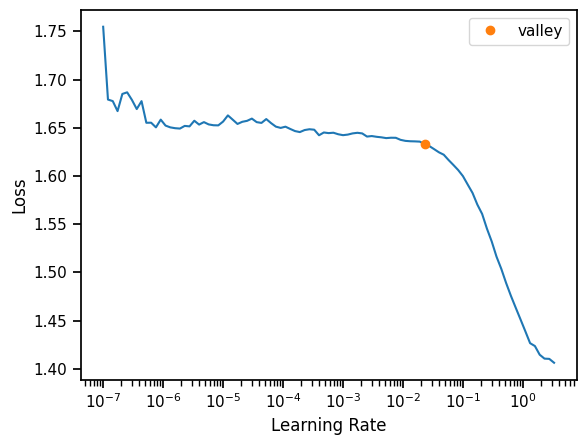

In [81]:
model = DotProductBias(n_users, n_rest, 50)
learn = Learner(data, model, loss_func=L1LossFlat(reduction='mean'))
init_loss = learn.loss_func(learn.model(x), y)
learn.lr_find()

In [82]:
learn.fit_one_cycle(10, 0.1445, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.859798,0.848196,01:08
1,0.939993,0.937569,00:47
2,0.956314,0.937389,01:02
3,0.924569,0.914599,01:04
4,0.919466,0.918040,00:59
5,0.886993,0.872454,00:57
6,0.861829,0.844319,00:52
7,0.803073,0.817811,00:47
8,0.604996,0.831989,00:41
9,0.417660,0.838631,00:39


In [83]:
final_loss = learn.loss_func(learn.model(x), y)
final_loss

TensorBase(0.4136, grad_fn=<AliasBackward0>)

In [84]:
assert final_loss < init_loss, (final_loss,init_loss)

In [85]:
learn = collab_learner(data, n_factors=50, y_range=[0, 5.5], loss_func=L1LossFlat(), wd=.1)
init_loss = learn.loss_func(learn.model(x), y)

SuggestedLRs(valley=0.0831763744354248)

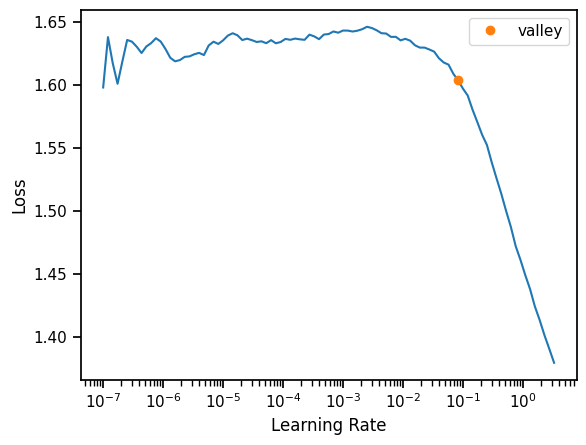

In [86]:
learn.lr_find()
#learn.recorder.plot_lr_find()

In [87]:
learn.fit_one_cycle(10, 0.048)

epoch,train_loss,valid_loss,time
0,0.862999,0.837611,00:44
1,0.832566,0.838666,00:45
2,0.840231,0.840253,00:59
3,0.833303,0.838907,01:00
4,0.816845,0.837576,00:58
5,0.760953,0.835002,00:55
6,0.686003,0.837639,00:50
7,0.554034,0.844509,00:45
8,0.407518,0.852239,00:38
9,0.301290,0.853808,00:36


In [88]:
final_loss = learn.loss_func(learn.model(x), y)

In [89]:
final_loss

TensorBase(0.2846, grad_fn=<AliasBackward0>)

In [90]:
assert final_loss < init_loss, (final_loss,init_loss)

In [91]:
print(x, y)

tensor([[19743,   141],
        [27210,   202],
        [31582,     6],
        [24353,   209],
        [51151,   261],
        [73289,    44],
        [33514,   246],
        [ 4138,   112],
        [ 2967,    43],
        [22630,   285],
        [ 2738,     4],
        [40453,     5],
        [35698,   134],
        [ 3733,     4],
        [62646,   225],
        [ 1002,    44],
        [21100,   152],
        [27211,   140],
        [ 6649,     4],
        [17955,   221],
        [40560,    48],
        [21714,   120],
        [47678,    59],
        [ 9776,   134],
        [48014,     9],
        [31229,   253],
        [22234,   285],
        [15414,   251],
        [55310,   122],
        [25077,   268],
        [18959,   273],
        [67911,    85],
        [ 1360,   186],
        [66232,   165],
        [72025,    43],
        [31551,   253],
        [42215,   120],
        [ 4548,     4],
        [ 2941,   204],
        [46146,   114],
        [13527,   227],
        [52213, 

In [92]:
for row in workingUsers[workingUsers['user-id'] == 23227].iterrows():
    print(row)

(25996, user-id          23227.0
restaurant-id      102.0
y                    4.0
Name: 25996, dtype: float64)
(54924, user-id          23227.0
restaurant-id      291.0
y                    4.0
Name: 54924, dtype: float64)


In [93]:
user = torch.tensor([[23227, 291]])
pred = learn.model(user)
print(f'{pred[0]}')

4.071688175201416


In [94]:
id_map = pd.read_csv('/content/drive/MyDrive/datasets/restaurant_data.csv')
id_map.drop_duplicates(subset=['Restaurant ID'], inplace=True)
len(id_map)

435

In [95]:
def truncate(n, decimals=1):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier

In [96]:
def hybrid_recommender_fastAI(userId, description):
    rest = contentB_recommend(description)
    # print(rest)
    # display('Prior to personal recommendations: ', rest.head(10))
    rest['est'] = rest['num_id'].apply(lambda x: truncate(learn.model(torch.tensor([[userId, x]]))))
    rest = rest.sort_values('est', ascending=False)
    return rest.head(10)

In [108]:
hybrid_recommender_fastAI(5, 'i want to eat fast food')

Processed user feedback: want eat fast food


,name,rating,location,price,cuisine,transactions,comments,similarity,id,num_id,est
14,Wah Fung No 1,5,New York,popular-eats,Fast Food,delivery,This restaurant will never fail you! Their quality and taste are always the best!!! I hope one day there will be a medium size -- I think that portion would be PERFECT,0.226377,X8ZS-dgiMIJvhwf9SaDnjw,11,4.6
146,Taiwan Pork Chop House,5,New York,popular-eats,Taiwanese,delivery,Amazingl!!! I can eat all day. My favorite spot in Chinatown. But just a heads up the the rice has a beef sauce on top of it. Very good but not for my friend who doesn't eat red meat,0.159180,kNOr6_g6QfBHdhf89j3g5w,100,4.6
1,LoveMama,5,New York,low,Thai,"delivery, pickup, restaurant_reservation","Absolutely LOVED LoveMama!! As a college student in nyc, it can be hard to come by reasonably priced yet delish authentic cuisine. But LoveMama really checked all the boxes for me! The food was just amazing and the portion sizes were perfect. Not to mention the service was outstanding. Everyone there is super friendly and kind. We also got our food so fast. I would give it 10 stars if I could!! Had such an amazing experience there and I'm already looking forward to the next time!",0.137214,jjJc_CrkB2HodEinB6cWww,1,4.4
63,Mom's Kitchen & Bar,4,New York,low,Comfort Food,"pickup, delivery","I realllllly tried to like this place. Looks like Applebee's on steroids. The food portions were HUGE! But they lacked in flavour. Like reallllly lacked. My avocado toast needed lemon juice, salt, pepper, whatever. I took bites from my friends dishes. Very meh. Come here if you want big potions at good price but keep your expectations low on everything else",0.091564,xMUZfoyzyJoTfZxrEZus4Q,43,4.4
192,Kiki's,3,New York,low,Greek,"delivery, pickup","Food is amazing and service is great. Ask for Alivia. If you're older, like me, get there early, fills up fast.",0.252234,_4Grm99JEHnDWskCHAJfUg,133,4.3
113,El Pingüino,5,Brooklyn,low,Spanish,,"Let me tell you, it's the perfect bar. Don't bother coming here if you just want a drink, because this gem will be wasted on you. The staff are as knowledgeable as they are passionate abt food; and they really care that you enjoy what you're eating or drinking. I love this place so much I stopped taking dates here because why TF would I speculate with fire?",0.157445,vNThH1YBC0OjgzEx_AJvMw,74,4.2
426,5ive Spice,5,New York,low,Vietnamese,"delivery, pickup",YUM! I was so excited when I saw 5ive Spice was opening because I had heard amazing things. I just got take out for now but when I went to pick it up the vibe inside made me wish I just went and sat to eat. I had the shrimp summer rolls and they were some of the best I've had in the city - SO FRESH. And the veggie pho in beef broth and it was phenomenal. I loved the roasted mushrooms in it. I'll definitely be back to eat in the restaurant and try more of their fusion options.,0.108193,ntiDPLkWm6GDLkYh0d2tBw,267,4.0
139,DunHuang Miss Noodles,1,Brooklyn,low,Chinese,"delivery, pickup","The food has consistently been really good. I usually order delivery. My favs are the oil spill noodle, eggplant salad, shu mai, pan fried noodles, cold noodle. I haven't been here to dine but i've been to their other locations where the service has been fast and polite!",0.155525,cOtB9fWWLrbaBebZDjJquQ,95,3.9
400,Go! Go! Curry!,4,New York,low,Japanese Curry,"delivery, pickup","Best Japanese curry in my opinion, they are consistent and quick. If you want a good meal, I would definitely recommend this chain restaurant.",0.112537,alFl7eiu6Go-YxZAdp88Fw,254,3.8
42,Momofuku Ssam Bar,3,New York,mid-range,Asian Fusion,,"The pork belly buns were nice but they are smokey in flavor and sous vide'd so they are nice and tender. Not a big fan of that ham flavor but this was good. The brussels sprouts were flavorful and did the trick to get a veggie fix. Pass on the bing. It is nothing more than naan and some kind of sweet chili jam. The meati nuggets were a tad spicy and perhaps should ha

In [98]:
hybrid_recommender_fastAI(0, 'burgers in new york')

Processed user feedback: burger new york


,name,rating,location,price,cuisine,transactions,comments,similarity,id,num_id,est
64,Ingas Bar,3,Brooklyn,low,American (New),,Cool relaxed vibe. This would be a good date spot at night time. The burger was fantastic and the cocktail menu is great for a summer day.,0.212803,48nRODGl30EWpYMcCTOeAw,44,4.3
411,Kings of Kobe,4,New York,low,Burgers,"delivery, pickup",The kings of Kobe was a great burger place and the food was amazingly tasty and delicious and with out a doubt the best place for burgers I believe everyone should go there for a great time. The service was great and no problems and the ambiance was great. I would recommend this place to all families and friends.,0.195167,H26qMBb0OFNn2xmSTM1Phw,259,4.2
114,Sweetwater Restaurant,4,Brooklyn,low,American (New),,"Yum! While I am def a meat eater, I love when a place makes their own veggie burger and Sweetwater did not disappoint. Very flavorful lentil and black bean burger as you and see in the picture- well seasoned, moist with a crust and mushy, cause... tasty legumes! The calamari was also tender and flavorful as well. Truffle fries came with a yummy house made mayo. We sat at the cute pretty outdoor booth and it was quiet and temperate for an autumn weekday. Also, quality service- all the staff were on point, attentive and friendly!",0.162576,8wMJdpw2R_4VfS55itB_gQ,75,4.0
370,7th Street Burger,4,New York,low,Burgers,"pickup, delivery",My brother claimed this the best burger of nyc! We got the loaded fries and double burgers again. Phenomenal!!,0.257776,VVYea3NzbklOyHEzSEavWw,234,3.9
393,Five Leaves,1,Brooklyn,low,American (New),delivery,Excellent restaurant. The most delicious food. Great staff. Cool people watching. Terrific service. Hot nespresso martini is a winner. Their kale salad is the best in New York City. Have the pancakes. Go hungry. Eat like crazy. It's such a great fun place. Enjoy.,0.250050,1Q3oaJahyGRogDWgpo7PIw,249,3.9
301,Miznon,4,New York,low,Mediterranean,"pickup, delivery","My favorite burger place!! Very close to 7th st burger in manhattan. The flavors blend amazingly with garlic sauce, the mountain of cheese, and very crispy pickles!! The pita is also very very fluffy but wasn't soggy. The service is very nice and they clean up after you!",0.191525,kTQ0rRfgtlPwX9_O8OY_UA,202,3.8
166,Locanda Verde,5,New York,mid-range,Italian,"delivery, pickup","Great spot, heard it was DeNiros restaurant. I'm not sure if that's true but it was top notch and loved the food. This location is $$$$$, but if you're looking for an authentic outdoor new York elite experience this is the spot. I would definitely go back. Reservations recommended.",0.240135,pk89jzL1RsE9U0thf_z6tw,113,3.7
389,The HiHi Room,4,New York,low,Burgers,"pickup, delivery","I dislike veggie burgers. But they have an amazing veggie burger. Basically, everything on the menu is amazing. Damn, on my way right now.",0.236883,QyB52nUrwJRY0ipuwcfR_A,246,3.7
176,Emily - West Village,5,New York,low,Pizza,"delivery, pickup","Service and staff is a little disorganized but the food makes up for it. We started our dinner with the Brussels sprouts salad which was excellent, then the Luca pizza and the burger. One of the best burgers in town, hands down! I will definitely go back to try the other pizzas on the menu. Ended the meal with banana pudding, so rich and a texture you can't find anywhere else.",0.157505,m86CNmYThtzzWB3nPnrhbg,121,3.4
381,Do Not Disturb,4,New York,low,Speakeasies,,"One of the more elevated speakeasy experiences I've had in a while. Crowd felt more New York than touristy, the music playlist added to the ambience. Cocktails were strong and the space itself was inviting without feeling stuffy. I wouldn't come here for a full dinner but definitely a pre or post dinner drink.",0.196758,WoMVwgn3E265w37gAM4BRQ,240,3.2


In [109]:
#Building the search engine
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))
corpus = filtered_restaurant_df['name']+' '+filtered_restaurant_df['cuisine']
tfidf = vectorizer.fit_transform(corpus)

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

#restaurants search engine
def search(name):
  name = name
  query_vec = vectorizer.transform([name])
  similarity = cosine_similarity(query_vec, tfidf).flatten()
  indices = np.argpartition(similarity, -3)[-3:]
  results = filtered_restaurant_df.iloc[indices][::-1]
  return results

import ipywidgets as widgets
from IPython.display import display

restaurant_input = widgets.Text(
    value='Kings of Kobe',
    description = 'Restaurant',
    disabled = False
)
restaurant_list = widgets.Output()

def on_type(data):
  with restaurant_list:
    restaurant_list.clear_output()
    name = data['new']
    if len(name) > 2:
      display(search(name))

restaurant_input.observe(on_type, names='value')
display(restaurant_input, restaurant_list)

Text(value='Kings of Kobe', description='Restaurant')

Output()

In [100]:
#SAVING THE MODELS
# dump of the content based recommender func
pickle.dump(contentB_recommend, open('content_base_r.pkl', 'wb'))

In [101]:
# create an iterator object with write permission - model.pkl
!pip install dill
import dill as pickle


#with open('ncf_model_pkl', 'wb') as files:
#    pickle.dump(hybrid_recommender_manNCF, files)

with open('hybrid.pkl', 'wb') as files:
    pickle.dump(hybrid_recommender_fastAI, files)

# dump of the cities list
pickle.dump(constituents_list,open('city.pkl','wb'))

# dump of the sentence processor func
pickle.dump(process_sentences, open('sentence_processor.pkl','wb'))

# dump of the price mapping
pickle.dump(price_map,open('prices.pkl','wb'))

#dump of the filtered_restaurants_df
pickle.dump(filtered_restaurant_df,open('restaurants.pkl','wb'))

# dump of the search engine
pickle.dump(search, open('search.pkl', 'wb'))






     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 2.8 MB/s eta 0:00:00


In [102]:
search = pickle.load(open('search.pkl','rb'))
search('kings of kobe')

,name,rating,price,URL,transactions,location,cuisine,id,review counts,num_id,comments,processed_comments,processed_cuisine,processed_transactions,bogs
411,Kings of Kobe,4,low,https://www.yelp.com/biz/kings-of-kobe-new-york-6?adjust_creative=YOPxpPg1qGggP5qGSctmew&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=YOPxpPg1qGggP5qGSctmew,"delivery, pickup",New York,Burgers,H26qMBb0OFNn2xmSTM1Phw,409,259,The kings of Kobe was a great burger place and the food was amazingly tasty and delicious and with out a doubt the best place for burgers I believe everyone should go there for a great time. The service was great and no problems and the ambiance was great. I would recommend this place to all families and friends.,The king Kobe great burger place food amazingly tasty delicious doubt best place burger I believe everyone go great time The service great problem ambiance great I would recommend place family friend,Burgers,delivery pickup,Burgers The king Kobe great burger place food amazingly tasty delicious doubt best place burger I believe everyone go great time The service great problem ambiance great I would recommend place family friend delivery pickup
444,Church Of Sweden,4,popular-eats,https://www.yelp.com/biz/church-of-sweden-manhattan-2?adjust_creative=YOPxpPg1qGggP5qGSctmew&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=YOPxpPg1qGggP5qGSctmew,,Manhattan,Scandinavian,rgT1QspkBHKHb7MlliBeuA,6,278,"I had never had a Swedish cinnamon bun before, and this was a great place to try them. Note that the cafe in the Church of Sweden is located in the basement and there are signs leading you there as well. The person running the cafe at the time was very kind and I could see baking trays full of freshly baked cinnamon buns right behind her (yum!!). The cinnamon buns were fresh and not too sweet and topped with a crunchy sugar topping. There is also coffee available!",I never Swedish cinnamon bun great place try Note cafe Church Sweden locate basement sign lead well The person run cafe time kind I could see bake tray full freshly bake cinnamon bun right behind yum The cinnamon bun fresh sweet top crunchy sugar top There also coffee available,Scandinavian,,Scandinavian I never Swedish cinnamon bun great place try Note cafe Church Sweden locate basement sign lead well The person run cafe time kind I could see bake tray full freshly bake cinnamon bun right behind yum The cinnamon bun fresh sweet top crunchy sugar top There also coffee available
194,Citizens Of Gramercy,5,low,https://www.yelp.com/biz/citizens-of-gramercy-new-york-2?adjust_creative=YOPxpPg1qGggP5qGSctmew&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=YOPxpPg1qGggP5qGSctmew,"delivery, pickup",New York,Australian,yCfjoS6XfnP8hd9zWjME7Q,202,135,"Love the menu here. It's a great neighborhood spot. The biscuit is worth getting and all the coffees are delicious. It's a trendy, cute breakfast spot.",Love menu It great neighborhood spot The biscuit worth get coffee delicious It trendy cute breakfast spot,Australian,delivery pickup,Australian Love menu It great neighborhood spot The biscuit worth get coffee delicious It trendy cute breakfast spot delivery pickup


In [103]:
hybrid = pickle.load(open('hybrid.pkl','rb'))
hybrid(2, 'good burgers with delivery')

Processed user feedback: good burger delivery


,name,rating,location,price,cuisine,transactions,comments,similarity,id,num_id,est
64,Ingas Bar,3,Brooklyn,low,American (New),,Cool relaxed vibe. This would be a good date spot at night time. The burger was fantastic and the cocktail menu is great for a summer day.,0.271750,48nRODGl30EWpYMcCTOeAw,44,4.6
240,Monkey Bar,2,New York,low,American (Traditional),,"This is probably the best burger I've ever had. I understand the price of the place is about the ambiance, service, and quality, and it definitely held up. The burger was cooked a perfect medium rare / medium and was so juicy. My friend ordered the red sauce paste and the pasta was cooked absolutely perfectly and was so delicious. She ordered the half order of the pasta and the chef gave us the other half on the house! Worth the experience and the everything we got was delicious.",0.227860,gZz9A8k8ORC_xl0aHxtY4w,167,4.5
370,7th Street Burger,4,New York,low,Burgers,"pickup, delivery",My brother claimed this the best burger of nyc! We got the loaded fries and double burgers again. Phenomenal!!,0.418993,VVYea3NzbklOyHEzSEavWw,234,4.4
411,Kings of Kobe,4,New York,low,Burgers,"delivery, pickup",The kings of Kobe was a great burger place and the food was amazingly tasty and delicious and with out a doubt the best place for burgers I believe everyone should go there for a great time. The service was great and no problems and the ambiance was great. I would recommend this place to all families and friends.,0.317228,H26qMBb0OFNn2xmSTM1Phw,259,4.4
114,Sweetwater Restaurant,4,Brooklyn,low,American (New),,"Yum! While I am def a meat eater, I love when a place makes their own veggie burger and Sweetwater did not disappoint. Very flavorful lentil and black bean burger as you and see in the picture- well seasoned, moist with a crust and mushy, cause... tasty legumes! The calamari was also tender and flavorful as well. Truffle fries came with a yummy house made mayo. We sat at the cute pretty outdoor booth and it was quiet and temperate for an autumn weekday. Also, quality service- all the staff were on point, attentive and friendly!",0.200574,8wMJdpw2R_4VfS55itB_gQ,75,4.1
389,The HiHi Room,4,New York,low,Burgers,"pickup, delivery","I dislike veggie burgers. But they have an amazing veggie burger. Basically, everything on the menu is amazing. Damn, on my way right now.",0.385034,QyB52nUrwJRY0ipuwcfR_A,246,3.9
239,Macao Trading Company,5,New York,mid-range,Asian Fusion,"delivery, pickup","Just come for the drinks and bar. Cocktails so tasty - drunken dragons milk is so sweet and creamy with coconut milk and green tea vodka, etc. Great service and bar area. The food itself though was very average and overpriced. Burger was cooked perfectly and very tasty. But both the burger and noodles pretty average and way overpriced for what they were",0.247338,U74_3F7r3tMhd6dmTmDBxQ,166,3.9
301,Miznon,4,New York,low,Mediterranean,"pickup, delivery","My favorite burger place!! Very close to 7th st burger in manhattan. The flavors blend amazingly with garlic sauce, the mountain of cheese, and very crispy pickles!! The pita is also very very fluffy but wasn't soggy. The service is very nice and they clean up after you!",0.311307,kTQ0rRfgtlPwX9_O8OY_UA,202,3.6
449,Leyla,4,New York,low,Turkish,"delivery, pickup",Amazing atmosphere cute place with lots of decoration great seating but do make a reservation. Greek type of food I got the lamb burger. And it was cooked perfectly with seasoned fries everything was delicious great waitress . Everyone loved there meals,0.187032,goKn7tKTIqpNPM_jR2yRCg,283,3.6
176,Emily - West Village,5,New York,low,Pizza,"delivery, pickup","Service and staff is a little disorganized but the food makes up for it. We started our dinner with the Brussels sprouts salad which was excellent, then the Luca pizza and the burger. One of the best burgers in town, hands down! I will definitely go back to try the other pizzas on the menu. Ended the meal with banana pudding, so rich and a texture

In [104]:
contentB = pickle.load(open('content_base_r.pkl','rb'))
contentB("a cheap restaurant that sells burgers")

Processed user feedback: cheap restaurant sell burger


,name,rating,location,price,cuisine,transactions,comments,similarity,id,num_id
370,7th Street Burger,4,New York,low,Burgers,"pickup, delivery",My brother claimed this the best burger of nyc! We got the loaded fries and double burgers again. Phenomenal!!,0.253370,VVYea3NzbklOyHEzSEavWw,234
389,The HiHi Room,4,New York,low,Burgers,"pickup, delivery","I dislike veggie burgers. But they have an amazing veggie burger. Basically, everything on the menu is amazing. Damn, on my way right now.",0.227696,QyB52nUrwJRY0ipuwcfR_A,246
411,Kings of Kobe,4,New York,low,Burgers,"delivery, pickup",The kings of Kobe was a great burger place and the food was amazingly tasty and delicious and with out a doubt the best place for burgers I believe everyone should go there for a great time. The service was great and no problems and the ambiance was great. I would recommend this place to all families and friends.,0.190994,H26qMBb0OFNn2xmSTM1Phw,259
301,Miznon,4,New York,low,Mediterranean,"pickup, delivery","My favorite burger place!! Very close to 7th st burger in manhattan. The flavors blend amazingly with garlic sauce, the mountain of cheese, and very crispy pickles!! The pita is also very very fluffy but wasn't soggy. The service is very nice and they clean up after you!",0.187011,kTQ0rRfgtlPwX9_O8OY_UA,202
176,Emily - West Village,5,New York,low,Pizza,"delivery, pickup","Service and staff is a little disorganized but the food makes up for it. We started our dinner with the Brussels sprouts salad which was excellent, then the Luca pizza and the burger. One of the best burgers in town, hands down! I will definitely go back to try the other pizzas on the menu. Ended the meal with banana pudding, so rich and a texture you can't find anywhere else.",0.155174,m86CNmYThtzzWB3nPnrhbg,121
240,Monkey Bar,2,New York,low,American (Traditional),,"This is probably the best burger I've ever had. I understand the price of the place is about the ambiance, service, and quality, and it definitely held up. The burger was cooked a perfect medium rare / medium and was so juicy. My friend ordered the red sauce paste and the pasta was cooked absolutely perfectly and was so delicious. She ordered the half order of the pasta and the chef gave us the other half on the house! Worth the experience and the everything we got was delicious.",0.141960,gZz9A8k8ORC_xl0aHxtY4w,167
64,Ingas Bar,3,Brooklyn,low,American (New),,Cool relaxed vibe. This would be a good date spot at night time. The burger was fantastic and the cocktail menu is great for a summer day.,0.138019,48nRODGl30EWpYMcCTOeAw,44
114,Sweetwater Restaurant,4,Brooklyn,low,American (New),,"Yum! While I am def a meat eater, I love when a place makes their own veggie burger and Sweetwater did not disappoint. Very flavorful lentil and black bean burger as you and see in the picture- well seasoned, moist with a crust and mushy, cause... tasty legumes! The calamari was also tender and flavorful as well. Truffle fries came with a yummy house made mayo. We sat at the cute pretty outdoor booth and it was quiet and temperate for an autumn weekday. Also, quality service- all the staff were on point, attentive and friendly!",0.126719,8wMJdpw2R_4VfS55itB_gQ,75
424,Canal Street Market,4,New York,low,Food Court,,"Honestly I've been going to this market since the day it opened. I always come here to get the bubble tea. Every time i'm in chinatown, I go here. I finally tried the chocolate they sold here and it was actually really good. not every day that I spend almost $4 on on chocolate but hey it was good to try it out. I also like the variety of filipino they have from kabisera, that authentic flavor is absolutely great. joes steam rice roll is also a wally good and fresh.",0.126717,AR_0QV4O12sHojkky_IMkg,266
43,Mắm,4,New York,low,Vietnamese,,"From selling bún đậu and other dishes at popup events to opening their own place, Mắm has come a long way. And I cannot be happier that now I can go get bún đậu any weekend I want. They still h

In [110]:
!pip install flask-ngrok